In [3]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random as rd
import time

In [23]:
mat = scipy.io.loadmat('mnist-original.mat') 
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(784,1) for i in range(len(data))] # on créé une nouvelle liste qui va contenir nos matrices 28x28

k=15 # nombre de cluster utilisé
m=70000 # nombre de données utilisées
n=784  
tol=10**(-1)

[42011, 5729, 51963, 23796, 66342, 39474, 54968, 64867, 55460, 56695, 26503, 43854, 63794, 36109, 50583]


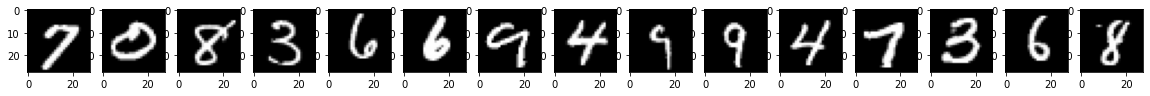

In [24]:
# on initialise les centroides aléatoirement et on associe les données correspondant 
clusters = {}
for i in range(k):
    clusters[i] = []
index=[]    
centroids= {}
for i in range(k):
    rand=rd.randint(0,m-1)
    index.append(rand)
    centroids[i] = X[rand]
    
fig, ax = plt.subplots(1,k,figsize=(20,2)) # affichage des centroïdes 
for i in range(k):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')
    
for data in X:
    euc_dist = [np.linalg.norm(data - centroids[j]) for j in range(k)]
    clusters[np.argmin(np.asarray(euc_dist))].append(data)
print(index)

In [25]:
def re_clusters(X, centroids, k):# fonction qui recalcule les clusters
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for data in X:
        euc_dist = [np.linalg.norm(data - centroids[j]) for j in range(k)]
        clusters[np.argmin(np.asarray(euc_dist))].append(data)
    return clusters

def re_centroids(clusters, k):# fonction qui recalcule les centroids
    centroids= {}
    for i in range(k):
        centroids[i] = np.mean(clusters[i], axis=0)
        
    return centroids

def coherence(centroids_j, clusters_j):
    temp=[np.linalg.norm(data - centroids_j)**2 for data in clusters_j ]
    return sum(temp)

def quality(centroids, clusters):
    temp=[coherence(centroids[i],clusters[i]) for i in range(k)]
    return sum(temp)


In [26]:
clusters_nv=re_clusters(X, centroids, k)
centroids_nv=re_centroids(clusters, k)
L=[]
start=time.time()
while abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv))>tol :
    L.append(abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv)))
    centroids=centroids_nv
    clusters=clusters_nv
    clusters_nv=re_clusters(X, centroids, k)
    centroids_nv=re_centroids(clusters_nv, k)
end=time.time()

262
Temps de réalisation : 3423.859050989151 secondes


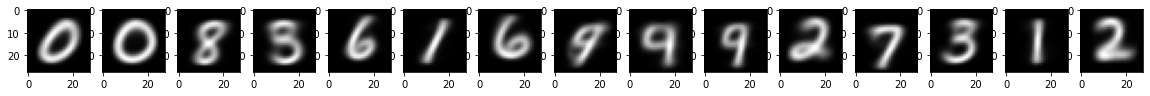

In [27]:
L.append(abs(quality(centroids, clusters)-quality(centroids_nv, clusters_nv)))
print(len(L))
print("Temps de réalisation : " + str(end-start) + " secondes")
fig, ax = plt.subplots(1,k,figsize=(20,2)) # affichage des centroïdes 
for i in range(k):
    ax[i].imshow(centroids[i].reshape(28,28),cmap='gray')

In [28]:
print(L)


[114305242914.35071, 23430412937.11917, 3673076348.776123, 2137921956.306305, 1601618311.494751, 1104149341.5481567, 759154476.1848145, 440817628.3213501, 227293649.30130005, 129242168.9657898, 86600006.90325928, 66317146.3538208, 54917319.43136597, 47043926.21411133, 39651215.82757568, 38481234.05187988, 49913596.582336426, 56783158.91381836, 65995327.46820068, 69013645.94125366, 66415221.328063965, 52101739.277038574, 32196736.596221924, 18290037.648284912, 13027877.208831787, 10447840.139923096, 8094639.839538574, 7848899.87612915, 8127940.675323486, 8156945.870056152, 7466777.74017334, 8262402.628448486, 10168434.204223633, 11525004.123413086, 12910496.721740723, 13370703.453826904, 12278656.83468628, 10467694.28881836, 10530587.331451416, 10066684.54989624, 7867485.641418457, 7076583.661956787, 7274000.116760254, 6152314.063659668, 5425668.40826416, 5085424.852386475, 4471422.062713623, 3693595.1875, 3417481.256164551, 2953754.0006103516, 2587202.661468506, 2263713.067718506, 2563

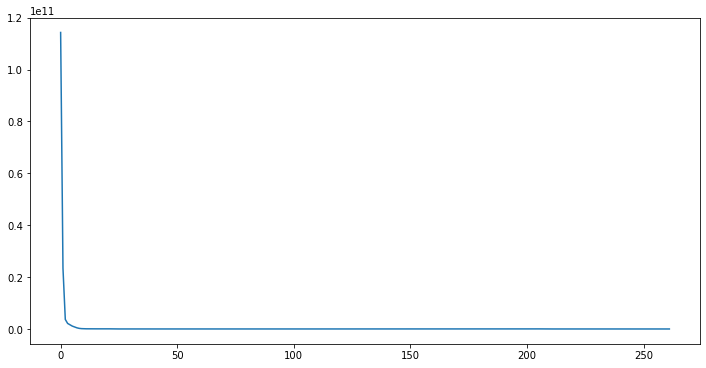

In [29]:
plt.figure(figsize=(12,6)) 
plt.plot([i for i in range(len(L))],L)
plt.show()